# Apple dataset

> We'll be creating an LSTM model for Closing price prediction

-------------------------------------------------------------------------------------------------------------------------------
#### 1. Import libraries

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import datetime
import mplfinance as mpf
import yfinance as yf

-------------------------------------------------------------------------------------------------------------------------------
#### 2. Import Dataset

In [321]:
data = pd.read_csv('AppleFinalData.csv')
data_alt = pd.read_csv('AppleFinalData.csv')

In [322]:
data.head()

,Date,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
0,2006-12-01,13.1143,13.1900,12.8714,91.32,13.0457,0.7707,0.032,0.905,0.063
1,2006-12-04,13.1257,13.1500,12.9286,91.12,13.0171,0.8720,0.011,0.904,0.085
2,2006-12-05,13.0929,13.1900,12.9814,91.27,13.0386,0.0000,0.000,0.000,0.000
3,2006-12-06,12.9486,13.0557,12.8100,89.83,12.8329,0.6858,0.029,0.878,0.093
4,2006-12-07,12.8614,12.9286,12.4143,87.04,12.4343,-0.6712,0.091,0.869,0.040


In [323]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
2512,2016-11-23,111.36,111.51,110.33,111.23,111.23,0.000,0.000,0.000,0.0
2513,2016-11-25,111.13,111.87,110.95,111.79,111.79,-0.899,0.115,0.885,0.0
2514,2016-11-28,111.43,112.47,111.39,111.57,111.57,0.000,0.000,0.000,0.0
2515,2016-11-29,110.78,112.03,110.07,111.46,111.46,0.000,0.000,0.000,0.0
2516,2016-11-30,111.60,112.20,110.27,110.52,110.52,0.000,0.000,0.000,0.0


In [324]:
sentiment = data.iloc[:, 6:]

In [325]:
sentiment.head()

,compound,neg,neu,pos
0,0.7707,0.032,0.905,0.063
1,0.8720,0.011,0.904,0.085
2,0.0000,0.000,0.000,0.000
3,0.6858,0.029,0.878,0.093
4,-0.6712,0.091,0.869,0.040


In [326]:
dates = data.iloc[:,0]
dates.head()

0    2006-12-01
1    2006-12-04
2    2006-12-05
3    2006-12-06
4    2006-12-07
Name: Date, dtype: object

In [327]:
sentiment = pd.DataFrame({'Date':dates,'Compound':sentiment['compound'], 'Neg':sentiment['neg'], 'Neu':sentiment['neu'], 'Pos':sentiment['pos']})

In [328]:
sentiment.head()

,Date,Compound,Neg,Neu,Pos
0,2006-12-01,0.7707,0.032,0.905,0.063
1,2006-12-04,0.8720,0.011,0.904,0.085
2,2006-12-05,0.0000,0.000,0.000,0.000
3,2006-12-06,0.6858,0.029,0.878,0.093
4,2006-12-07,-0.6712,0.091,0.869,0.040


In [329]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2517 non-null   object 
 1   Compound  2517 non-null   float64
 2   Neg       2517 non-null   float64
 3   Neu       2517 non-null   float64
 4   Pos       2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.4+ KB


In [330]:
'''
As we can see that the 'Date' column has the data type, Object. 
So let's change the datatype to Datetime.

'''

def datetime_change(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


In [331]:
# now lets apply it to each observation in our 'Date' column

sentiment['Date'] = sentiment['Date'].apply(datetime_change)
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2517 non-null   datetime64[ns]
 1   Compound  2517 non-null   float64       
 2   Neg       2517 non-null   float64       
 3   Neu       2517 non-null   float64       
 4   Pos       2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 98.4 KB


In [332]:
aapl = yf.download("AAPL", start="2006-12-01", end="2016-11-30")

[*********************100%%**********************]  1 of 1 completed


In [333]:
aapl.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-12-01,3.278571,3.297500,3.217857,3.261429,2.768290,795079600
2006-12-04,3.281429,3.287500,3.232143,3.254286,2.762227,709536800
2006-12-05,3.273214,3.297500,3.245357,3.259643,2.766773,662838400
2006-12-06,3.237143,3.263929,3.202500,3.208214,2.723121,638184400
2006-12-07,3.215357,3.232143,3.103571,3.108571,2.638544,1004827600


In [334]:
aapl.reset_index(inplace=True)
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,3.278571,3.297500,3.217857,3.261429,2.768290,795079600
1,2006-12-04,3.281429,3.287500,3.232143,3.254286,2.762227,709536800
2,2006-12-05,3.273214,3.297500,3.245357,3.259643,2.766773,662838400
3,2006-12-06,3.237143,3.263929,3.202500,3.208214,2.723121,638184400
4,2006-12-07,3.215357,3.232143,3.103571,3.108571,2.638544,1004827600


In [335]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [336]:
data = pd.merge(aapl, sentiment, on='Date', how='outer')

In [337]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
0,2006-12-01,3.278571,3.297500,3.217857,3.261429,2.768290,7.950796e+08,0.7707,0.032,0.905,0.063
1,2006-12-04,3.281429,3.287500,3.232143,3.254286,2.762227,7.095368e+08,0.8720,0.011,0.904,0.085
2,2006-12-05,3.273214,3.297500,3.245357,3.259643,2.766773,6.628384e+08,0.0000,0.000,0.000,0.000
3,2006-12-06,3.237143,3.263929,3.202500,3.208214,2.723121,6.381844e+08,0.6858,0.029,0.878,0.093
4,2006-12-07,3.215357,3.232143,3.103571,3.108571,2.638544,1.004828e+09,-0.6712,0.091,0.869,0.040


In [338]:
data.to_csv('AppleFinalUnscaled.csv', encoding='utf-8', index=0)

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   float64       
 7   Compound   2517 non-null   float64       
 8   Neg        2517 non-null   float64       
 9   Neu        2517 non-null   float64       
 10  Pos        2517 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 236.0 KB


In [283]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2517.000000,2517.000000,2517.000000,2517.000000
mean,15.174888,15.320467,15.011446,15.168858,13.344503,5.384197e+08,0.476040,0.049342,0.787482,0.086106
std,9.052898,9.118844,8.980969,9.049615,8.276088,3.961938e+08,0.626543,0.036409,0.232429,0.043860
min,2.791071,2.901786,2.741786,2.792857,2.370567,4.590360e+07,-0.997000,0.000000,0.000000,0.000000
25%,6.389911,6.464286,6.260893,6.384732,5.419340,2.546993e+08,0.000000,0.024000,0.812000,0.060000
50%,14.285714,14.411250,14.117143,14.267678,12.142337,4.312686e+08,0.822800,0.045000,0.852000,0.087000
75%,23.447500,23.643126,23.164375,23.424999,20.511857,7.102949e+08,0.954600,0.069000,0.883000,0.113000
max,33.615002,33.634998,32.849998,33.250000,29.941341,3.372970e+09,0.999200,0.363000,1.000000,0.283000


-------------------------------------------------------------------------------------------------------------------------------
#### 3. Check for missing values

In [284]:
missing_val = data.isna().sum()

if missing_val.sum()>0:
    print('There are missing values!')
    print(missing_val)
else:
    print('There are no missing values!')

There are missing values!
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Compound     0
Neg          0
Neu          0
Pos          0
dtype: int64


In [285]:
data = data.dropna()

In [286]:
missing_val = data.isna().sum()

if missing_val.sum()>0:
    print('There are missing values!')
    print(missing_val)
else:
    print('There are no missing values!')

There are no missing values!


-------------------------------------------------------------------------------------------------------------------------------
#### 4. Encode Categorical data

##### >>There is no Categorical data

-------------------------------------------------------------------------------------------------------------------------------
#### 5. Feature selection

In [287]:
#data = data.drop('neg', axis = 1)
#data = data.drop('neu', axis = 1)
#data = data.drop('pos', axis = 1)

-------------------------------------------------------------------------------------------------------------------------------
#### 6. Visualizations

In [288]:
print(mpf.available_styles())

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


In [289]:
data_alt.index = data_alt.pop('Date')
#data_alt = pd.DataFrame({'Close': data_alt['Close']})
data_alt.index = pd.to_datetime(data_alt.index)
data_alt.head()

,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
Date,,,,,,,,,
2006-12-01,13.1143,13.1900,12.8714,91.32,13.0457,0.7707,0.032,0.905,0.063
2006-12-04,13.1257,13.1500,12.9286,91.12,13.0171,0.8720,0.011,0.904,0.085
2006-12-05,13.0929,13.1900,12.9814,91.27,13.0386,0.0000,0.000,0.000,0.000
2006-12-06,12.9486,13.0557,12.8100,89.83,12.8329,0.6858,0.029,0.878,0.093
2006-12-07,12.8614,12.9286,12.4143,87.04,12.4343,-0.6712,0.091,0.869,0.040


In [290]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
2511,2016-11-22,27.987499,28.105000,27.850000,27.950001,26.045898,103862000.0,-0.8885,0.130,0.786,0.084
2512,2016-11-23,27.840000,27.877501,27.582500,27.807501,25.913101,109705600.0,0.0000,0.000,0.000,0.000
2513,2016-11-25,27.782499,27.967501,27.737499,27.947500,26.043566,45903600.0,-0.8990,0.115,0.885,0.000
2514,2016-11-28,27.857500,28.117500,27.847500,27.892500,25.992310,108776000.0,0.0000,0.000,0.000,0.000
2515,2016-11-29,27.695000,28.007500,27.517500,27.865000,25.966686,114115200.0,0.0000,0.000,0.000,0.000


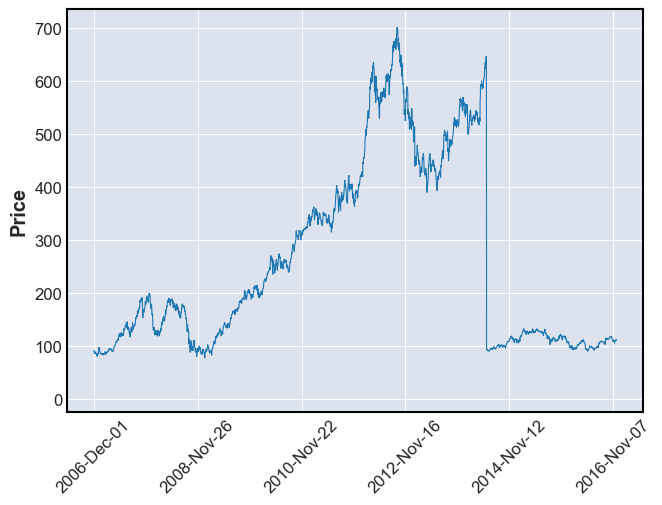

In [291]:
mpf.plot(data_alt, type='line', style='kenan')

In [292]:
# a) lets create a graph showing the Closing Price for the start of each day

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data.Date), y=list(data.Close)))

# Set title
fig.update_layout(
    title_text="Closing Prices Each Day"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

-------------------------------------------------------------------------------------------------------------------------------
#### 7.Arrange dataset

In [293]:
#data.index = data.pop('Date')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
0,2006-12-01,3.278571,3.297500,3.217857,3.261429,2.768289,7.950796e+08,0.7707,0.032,0.905,0.063
1,2006-12-04,3.281429,3.287500,3.232143,3.254286,2.762226,7.095368e+08,0.8720,0.011,0.904,0.085
2,2006-12-05,3.273214,3.297500,3.245357,3.259643,2.766773,6.628384e+08,0.0000,0.000,0.000,0.000
3,2006-12-06,3.237143,3.263929,3.202500,3.208214,2.723121,6.381844e+08,0.6858,0.029,0.878,0.093
4,2006-12-07,3.215357,3.232143,3.103571,3.108571,2.638543,1.004828e+09,-0.6712,0.091,0.869,0.040


In [294]:
data = data[["Date", "Open", "High", "Adj Close", "Low","Volume", "Compound", "Neg", "Neu", "Pos", "Close"]]
data.head()

,Date,Open,High,Adj Close,Low,Volume,Compound,Neg,Neu,Pos,Close
0,2006-12-01,3.278571,3.297500,2.768289,3.217857,7.950796e+08,0.7707,0.032,0.905,0.063,3.261429
1,2006-12-04,3.281429,3.287500,2.762226,3.232143,7.095368e+08,0.8720,0.011,0.904,0.085,3.254286
2,2006-12-05,3.273214,3.297500,2.766773,3.245357,6.628384e+08,0.0000,0.000,0.000,0.000,3.259643
3,2006-12-06,3.237143,3.263929,2.723121,3.202500,6.381844e+08,0.6858,0.029,0.878,0.093,3.208214
4,2006-12-07,3.215357,3.232143,2.638543,3.103571,1.004828e+09,-0.6712,0.091,0.869,0.040,3.108571


-------------------------------------------------------------------------------
#### Data Normalization

In [295]:
data_2 = data.drop('Date', axis=1)
data_2 = (data_2 - data_2.min())/(data_2.max() - data_2.min())
data = pd.concat((data_2, data['Date']), 1)

data = data.iloc[:, [10,0,1,2,3,4,5,6,7,8,9] ]
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11640\3399143117.py:3: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,Date,Open,High,Adj Close,Low,Volume,Compound,Neg,Neu,Pos,Close
0,2006-12-01,0.015816,0.012876,0.014425,0.015812,0.225176,0.885533,0.088154,0.905,0.222615,0.015385
1,2006-12-04,0.015908,0.012550,0.014206,0.016286,0.199465,0.936279,0.030303,0.904,0.300353,0.015150
2,2006-12-05,0.015642,0.012876,0.014371,0.016725,0.185429,0.499449,0.000000,0.000,0.000000,0.015326
3,2006-12-06,0.014472,0.011783,0.012787,0.015302,0.178019,0.843002,0.079890,0.878,0.328622,0.013637
4,2006-12-07,0.013765,0.010749,0.009720,0.012016,0.288219,0.163210,0.250689,0.869,0.141343,0.010366


In [296]:
#apple_df=data

In [297]:
#%store apple_df

Stored 'apple_df' (DataFrame)


======================================================================================================================

-------------------------------------------------------------------------------------------------------------------------------
#### 3. Data Splitting

In [298]:
y = data.iloc[:, 10]
X = data.iloc[:, 0:10]
X.head()

,Date,Open,High,Adj Close,Low,Volume,Compound,Neg,Neu,Pos
0,2006-12-01,0.015816,0.012876,0.014425,0.015812,0.225176,0.885533,0.088154,0.905,0.222615
1,2006-12-04,0.015908,0.012550,0.014206,0.016286,0.199465,0.936279,0.030303,0.904,0.300353
2,2006-12-05,0.015642,0.012876,0.014371,0.016725,0.185429,0.499449,0.000000,0.000,0.000000
3,2006-12-06,0.014472,0.011783,0.012787,0.015302,0.178019,0.843002,0.079890,0.878,0.328622
4,2006-12-07,0.013765,0.010749,0.009720,0.012016,0.288219,0.163210,0.250689,0.869,0.141343


In [299]:
y.head()

0    0.015385
1    0.015150
2    0.015326
3    0.013637
4    0.010366
Name: Close, dtype: float64

In [300]:
y = pd.DataFrame({'Date':X["Date"],'Close':y})

In [301]:
y.head()

,Date,Close
0,2006-12-01,0.015385
1,2006-12-04,0.015150
2,2006-12-05,0.015326
3,2006-12-06,0.013637
4,2006-12-07,0.010366


In [302]:
dates = X.iloc[:, 0]
len(dates)

2516

In [303]:
X.index = X.pop('Date')
X

,Open,High,Adj Close,Low,Volume,Compound,Neg,Neu,Pos
Date,,,,,,,,,
2006-12-01,0.015816,0.012876,0.014425,0.015812,0.225176,0.885533,0.088154,0.905,0.222615
2006-12-04,0.015908,0.012550,0.014206,0.016286,0.199465,0.936279,0.030303,0.904,0.300353
2006-12-05,0.015642,0.012876,0.014371,0.016725,0.185429,0.499449,0.000000,0.000,0.000000
2006-12-06,0.014472,0.011783,0.012787,0.015302,0.178019,0.843002,0.079890,0.878,0.328622
2006-12-07,0.013765,0.010749,0.009720,0.012016,0.288219,0.163210,0.250689,0.869,0.141343
...,...,...,...,...,...,...,...,...,...
2016-11-22,0.817431,0.820064,0.858711,0.833932,0.017420,0.054353,0.358127,0.786,0.296820
2016-11-23,0.812646,0.812662,0.853895,0.825048,0.019177,0.499449,0.000000,0.000,0.000000
2016-11-25,0.810780,0.815590,0.858627,0.830196,0.000000,0.049093,0.316804,0.885,0.000000


In [304]:
y.index = y.pop('Date')
y

,Close
Date,
2006-12-01,0.015385
2006-12-04,0.015150
2006-12-05,0.015326
2006-12-06,0.013637
2006-12-07,0.010366
...,...
2016-11-22,0.825985
2016-11-23,0.821306
2016-11-25,0.825903


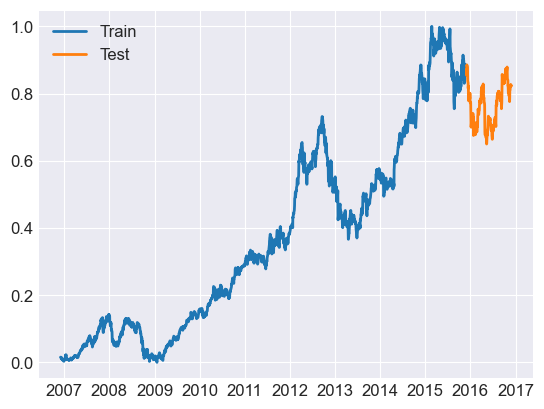

In [305]:
sns.set_style('darkgrid')
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_90], X[:q_90], y[:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

In [306]:
dates_train.tail()

2259   2015-11-23
2260   2015-11-24
2261   2015-11-25
2262   2015-11-27
2263   2015-11-30
Name: Date, dtype: datetime64[ns]

========================================================================================================================

# Model creation

In [310]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((9, 1)),
                    layers.LSTM(64),# the number determines how complex your model
                    layers.Dense(32, activation='relu'),
                    layers.Dense(16, activation='relu'),
                    #layers.Dense(8, activation='relu'),
                    layers.Dense(1)]) # only one value to be predicted

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=5)

Epoch 1/30
71/71 [==============================] - 5s 9ms/step - loss: 0.1776 - mean_absolute_error: 0.3216
Epoch 2/30
71/71 [==============================] - 1s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.2260
Epoch 3/30
71/71 [==============================] - 1s 9ms/step - loss: 0.0384 - mean_absolute_error: 0.1683
Epoch 4/30
71/71 [==============================] - 1s 8ms/step - loss: 0.0231 - mean_absolute_error: 0.1286
Epoch 5/30
71/71 [==============================] - 1s 9ms/step - loss: 0.0103 - mean_absolute_error: 0.0810
Epoch 6/30
71/71 [==============================] - 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0556
Epoch 7/30
71/71 [==============================] - 1s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0493
Epoch 8/30
71/71 [==============================] - 1s 9ms/step - loss: 0.0033 - mean_absolute_error: 0.0458
Epoch 9/30
71/71 [==============================] - 1s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0418
Epoch 10/30
71/71 

-------------------------------------------------------------------------------------------------------------------------------

#### 5. Predictions

##### Training Predictions

71/71 [==============================] - 0s 5ms/step


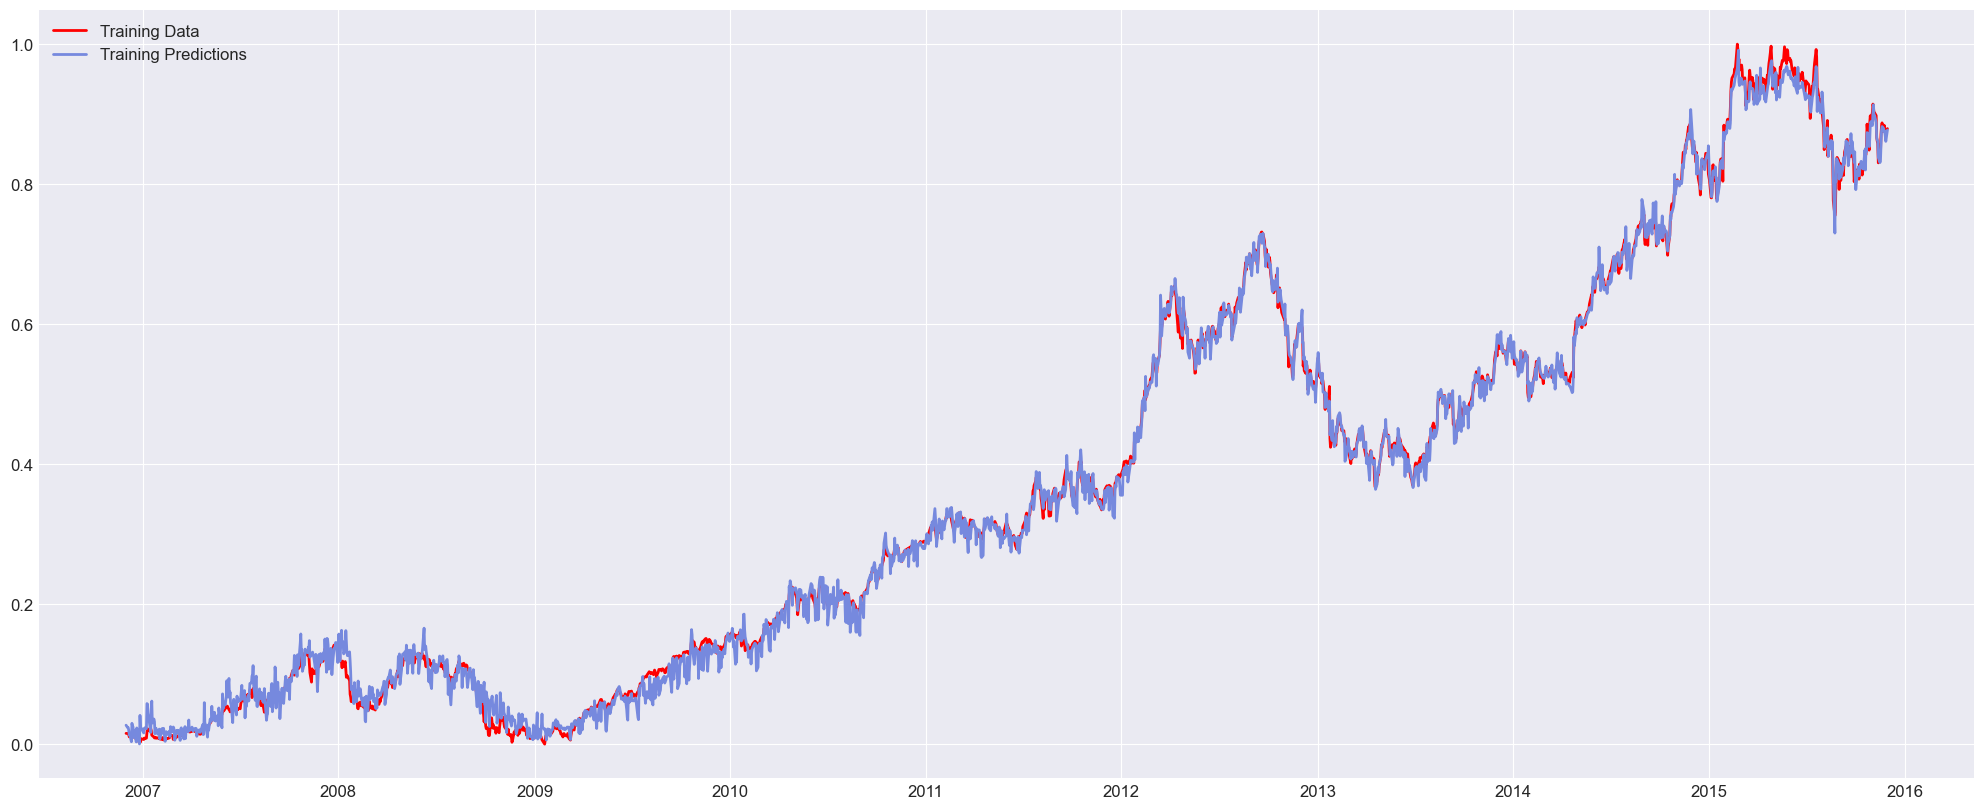

In [314]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(25, 10))
plt.plot(dates_train, y_train, color="#FF0000")
plt.plot(dates_train, train_predictions, color="#7689de")
plt.legend(['Training Data', 'Training Predictions'])

In [196]:
#y_train_df=pd.DataFrame({'Data':y_train})
train_predictions_df=pd.DataFrame({'Date':y_train.index,'Data':train_predictions})

In [197]:
train_predictions_df.index = train_predictions_df.pop("Date")
train_predictions_df.head()

,Data
Date,
2006-12-01,0.023151
2006-12-04,0.019246
2006-12-05,0.020572
2006-12-06,0.014678
2006-12-07,0.008822


In [198]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_train, train_predictions_df)
mse = mean_squared_error(y_train, train_predictions_df)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)

Mean Absolute Error: 0.01008619334664092
Mean Squared Error: 0.00018876247404050857
Root Mean Absolute Error: 0.013739085633349425


--------------------------------------------------------------------------------------------------------------------------------

##### Test Predictions

8/8 [==============================] - 0s 4ms/step


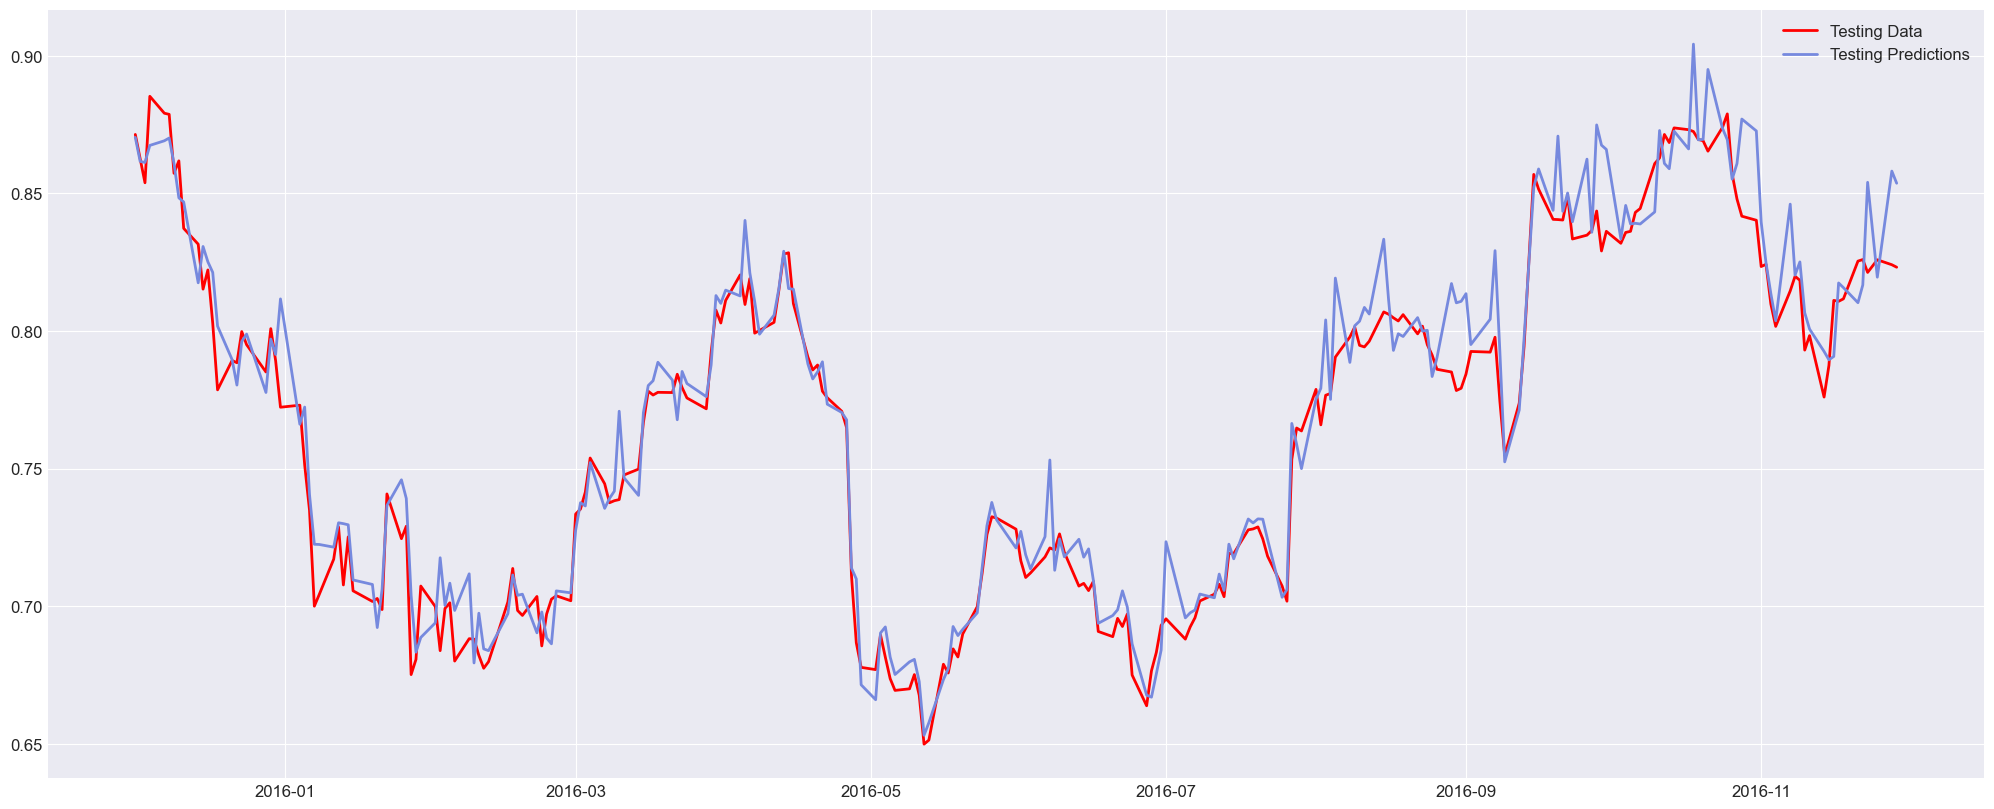

In [316]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(25, 10))
plt.plot(dates_test, y_test, color="#FF0000")
plt.plot(dates_test, test_predictions, color="#7689de")
plt.legend(['Testing Data', 'Testing Predictions'])

------------------------------------------------------------------------------------------------------------------------------
#### 6. Error evaluation

In [318]:
test_predictions_df=pd.DataFrame({'Date':y_test.index,'Data':test_predictions})
test_predictions_df.index = test_predictions_df.pop("Date")
test_predictions_df.head()

,Data
Date,
2015-12-01,0.870397
2015-12-02,0.861681
2015-12-03,0.861282
2015-12-04,0.867470
2015-12-07,0.869157


In [319]:
mae = mean_absolute_error(y_test, test_predictions_df)
mse = mean_squared_error(y_test, test_predictions_df)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.009541558162859322
Mean Squared Error: 0.00017778348206443718
Root Mean Squared Error: 0.013333547242367171


========================================================================================================================

# References

1. https://www.youtube.com/@GregHogg
2. https://stackoverflow.com/questions/33157528/correlation-between-two-dataframes
3. https://plotly.com/python/range-slider/
4. https://www.kaggle.com/datasets/BidecInnovations/stock-price-and-news-realted-to-it?select=MicrosoftFinalData.csv